### comments and exploring the data
in this document 'tagaddod-d8ffe--MsZkGFSCtYxntenMuVF-export.json'
- there is no collector id in some records
- all records has no 'meta data' field except for one record
- destination request id is not available in all records
- at the end there is a record with name 'meta-data' that has only the collector id for all columns
- NAN is not included in the count but 'nan' is included !!
- collector id is the same in each file
- two devices or three for each collector
- destination request id is around 12 but sometimes 156
- \# of records are around 1700,2000,84 and 18,000

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json("tagaddod-d8ffe--MsZkGFSCtYxntenMuVF-export.json") 
df = df.T ## to edit the format
df.head()

,device_id,latitude,longitude,snapshot_datetime,meta-data,collector_id,destination_request_id
-MseZ2fAZ1SjLMaYOXy2,fe175d9955fced88,30.042313,31.33642,2022-01-05 16:06:42.373120,NaN,NaN,NaN
-MseZ3tJG5FeQy7OEB6H,fe175d9955fced88,30.042313,31.33642,2022-01-05 16:06:47.379586,NaN,NaN,NaN
-MseZ57uwVY_hYJ_G8nF,fe175d9955fced88,30.042313,31.33642,2022-01-05 16:06:52.473970,NaN,NaN,NaN
-MseZ6JS8eUMGMr-6cF0,fe175d9955fced88,30.042313,31.33642,2022-01-05 16:06:57.308858,NaN,NaN,NaN
-MseZ7XzNXS16vXvrVYO,fe175d9955fced88,30.042313,31.33642,2022-01-05 16:07:02.335482,NaN,NaN,NaN


In [3]:
df.shape

(2136, 7)

In [4]:
df.loc['meta-data',:]

device_id                  NaN
latitude                   NaN
longitude                  NaN
snapshot_datetime          NaN
meta-data                  NaN
collector_id              51.0
destination_request_id     NaN
Name: meta-data, dtype: object

In [5]:
df.loc['-Mt73Jj0QRoPye_E3pGY',:]['meta-data']

{'device_id': 'b8e1d679ea29c711',
 'latitude': '27.21240209613208',
 'longitude': '31.160887526671843',
 'snapshot_datetime': '2022-01-11 07:36:37'}

#### len of unique values in each column

In [9]:
print('len of snapshot date time is ', len(df['snapshot_datetime'].unique()) ) ## this is the primary key for each record
print('len of destination_request_id is ', len(df['destination_request_id'].unique()) ) 
print('len of device_id is ', len(df['device_id'].unique()) ) 
print('len of latitude is ', len(df['latitude'].unique()) ) 
print('len of longitude is ', len(df['longitude'].unique()) ) 
print('len of collector_id is ', len(df['collector_id'].unique()) )  ## 3 values but actually they are 51,51.0 and N/A


len of snapshot date time is  2135
len of destination_request_id is  12
len of device_id is  4
len of latitude is  790
len of longitude is  784
len of collector_id is  3


#### unique values and histogram

In [10]:
print(df['device_id'].unique()) ## two devices and some nans and N/A
print(df['destination_request_id'].unique()) ## 11 values and nans
print(df['collector_id'].unique()) ## one value and nans 
print(df['snapshot_datetime'].unique()) ## nan is included in the count

['fe175d9955fced88' 'b8e1d679ea29c711' nan 'N/A']
[nan '3309' '7470' '1696' '3199' '1851' '7544' '1472' '3198' '7412' '7385'
 '7452']
[nan '51' 51.0]
['2022-01-05 16:06:42.373120' '2022-01-05 16:06:47.379586'
 '2022-01-05 16:06:52.473970' ... '2022-01-17 14:33:10.192465'
 '2022-01-17 14:33:16.780540' '2022-01-17 14:33:20.137822']


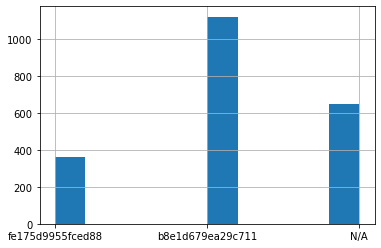

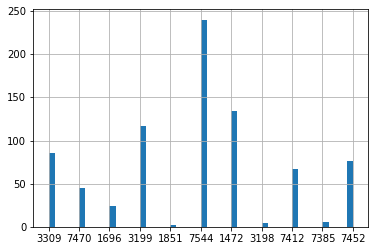

In [11]:
df['device_id'].hist()
plt.show()
df['destination_request_id'].hist(bins=50) ##more like a normal distribution
plt.show()


## exploring the second file

In [12]:
df2 = pd.read_json("tagaddod-d8ffe--MszT9RZtTjcM5PwTCBH-export.json") 
df2 = df2.T ## to edit the format
df2.head()

,collector_id,device_id,latitude,longitude,snapshot_datetime,destination_request_id
-Mu1Ke3YXnTlv_8zTedq,99,a5f55343f48cf3b2,30.915783,30.299763,2022-01-22 17:10:22.499088,NaN
-Mu1KfCkHPhyBE-_P9_y,99,a5f55343f48cf3b2,30.915783,30.299763,2022-01-22 17:10:27.184939,NaN
-Mu1KgR2hK2WOQDXF6d1,99,a5f55343f48cf3b2,30.915275,30.300481,2022-01-22 17:10:32.195519,NaN
-Mu1KheX3sUPsJ_26x0F,99,a5f55343f48cf3b2,30.915274,30.300482,2022-01-22 17:10:37.218805,NaN
-Mu1KisXMKQhSuocFh8c,99,a5f55343f48cf3b2,30.915278,30.300476,2022-01-22 17:10:42.210450,NaN


In [13]:
df2.shape

(18248, 6)

In [14]:
df2.loc['meta-data',:]

collector_id              99.0
device_id                  NaN
latitude                   NaN
longitude                  NaN
snapshot_datetime          NaN
destination_request_id     NaN
Name: meta-data, dtype: object

In [15]:
len(df2.index.unique())

18248

In [16]:
print('len of snapshot date time is ', len(df2['snapshot_datetime'].unique()) ) ## this is the primary key for each record
print('len of destination_request_id is ', len(df2['destination_request_id'].unique()) ) 
print('len of device_id is ', len(df2['device_id'].unique()) ) 
print('len of latitude is ', len(df2['latitude'].unique()) ) 
print('len of longitude is ', len(df2['longitude'].unique()) ) 
print('len of collector_id is ', len(df2['collector_id'].unique()) )  ## 3 values but actually they are 51,51.0 and N/A


len of snapshot date time is  18248
len of destination_request_id is  156
len of device_id is  4
len of latitude is  8299
len of longitude is  8132
len of collector_id is  2


In [38]:
print(df2['device_id'].unique()) ## three devices and some nans and N/A
#print(df2['destination_request_id'].unique()) ## 156 values and nans
print(df2['collector_id'].unique()) ## one value and nans 
print(df2['snapshot_datetime'].unique()) ## nan is included in the count

['a5f55343f48cf3b2' '96ddc11dcb259ebd' '3967850978244b31' nan]
['99' 99.0]
['2022-01-22 17:10:22.499088' '2022-01-22 17:10:27.184939'
 '2022-01-22 17:10:32.195519' ... '2022-04-05 21:50:53.747493'
 '2022-04-05 21:50:58.092109' nan]


In [17]:
(df2['snapshot_datetime'].unique())

array(['2022-01-22 17:10:22.499088', '2022-01-22 17:10:27.184939',
       '2022-01-22 17:10:32.195519', ..., '2022-04-05 21:50:53.747493',
       '2022-04-05 21:50:58.092109', nan], dtype=object)

## third and forth files

In [18]:
df3 = pd.read_json("tagaddod-d8ffe--MwWeqpG3yuQD7G2wcp8-export.json") 
df3 = df3.T ## to edit the format
df3.head()

,collector_id,device_id,latitude,longitude,snapshot_datetime,destination_request_id
-MwWgmIKz8ZLI-S3HtAp,157,0891846aad4e869e,29.952633,30.888284,2022-02-22 15:51:02.869005,NaN
-MwWgmyb-JvddB_4D41K,157,0891846aad4e869e,29.952633,30.888284,2022-02-22 15:51:05.639681,NaN
-MwWgoX1YBF7jLDYPzHj,157,0891846aad4e869e,29.952638,30.888283,2022-02-22 15:51:12.002744,NaN
-MwWgpLvpj_9XZK1rza7,157,0891846aad4e869e,29.952638,30.888283,2022-02-22 15:51:15.387694,NaN
-MwWgqwJCVqXiZnRyYxK,157,0891846aad4e869e,29.952642,30.888282,2022-02-22 15:51:21.876488,NaN


In [19]:
df3.shape

(1719, 6)

In [20]:
df3.loc['meta-data',:]

collector_id              157.0
device_id                   NaN
latitude                    NaN
longitude                   NaN
snapshot_datetime           NaN
destination_request_id      NaN
Name: meta-data, dtype: object

In [21]:
print('len of snapshot date time is ', len(df3['snapshot_datetime'].unique()) ) ## this is the primary key for each record
print('len of destination_request_id is ', len(df3['destination_request_id'].unique()) ) 
print('len of device_id is ', len(df3['device_id'].unique()) ) 
print('len of latitude is ', len(df3['latitude'].unique()) ) 
print('len of longitude is ', len(df3['longitude'].unique()) ) 
print('len of collector_id is ', len(df3['collector_id'].unique()) )  ## 3 values but actually they are 51,51.0 and N/A


len of snapshot date time is  1719
len of destination_request_id is  12
len of device_id is  2
len of latitude is  1016
len of longitude is  1029
len of collector_id is  2


In [23]:
print(df3['device_id'].unique()) ## two devices and some nans and N/A
print(df3['destination_request_id'].unique()) ## 11 values and nans
print(df3['collector_id'].unique()) ## one value and nans 
print(df3['snapshot_datetime'].unique()) ## nan is included in the count

['0891846aad4e869e' nan]
[nan '238062' '238079' '320684' '320649' '320657' '321656' '320668'
 '320679' '336857' '339961' '345063']
['157' 157.0]
['2022-02-22 15:51:02.869005' '2022-02-22 15:51:05.639681'
 '2022-02-22 15:51:12.002744' ... '2022-06-03 00:49:53.122114'
 '2022-06-03 00:49:59.771898' nan]


## forth file

In [29]:
df4 = pd.read_json("tagaddod-d8ffe--N4SUsENXI1OF1qf8VxT-export.json") 
df4 = df4.T ## to edit the format
df4.head()

,collector_id,device_id,latitude,longitude,snapshot_datetime
-N4SWCnP5uAPMk2vlgsh,257,a685f0f069042727,30.562314,31.560081,2022-06-13 16:43:17.338230
-N4SWDqDqUVYxPTGsEYr,257,a685f0f069042727,30.562314,31.560081,2022-06-13 16:43:21.614333
-N4SWFG074ZdMJm5B7h3,257,a685f0f069042727,30.562314,31.560081,2022-06-13 16:43:27.425884
-N4SWG6b3kT3WQxIjw_x,257,a685f0f069042727,30.562314,31.560081,2022-06-13 16:43:30.918961
-N4SWHi3Zq_pQl99SaVN,257,a685f0f069042727,30.562314,31.560081,2022-06-13 16:43:37.476021


In [34]:
df4.shape

(84, 5)

In [35]:
df4.loc['meta-data',:]

collector_id         257.0
device_id              NaN
latitude               NaN
longitude              NaN
snapshot_datetime      NaN
Name: meta-data, dtype: object

In [31]:
print('len of snapshot date time is ', len(df4['snapshot_datetime'].unique()) ) ## this is the primary key for each record
#print('len of destination_request_id is ', len(df4['destination_request_id'].unique()) ) 
print('len of device_id is ', len(df4['device_id'].unique()) ) 
print('len of latitude is ', len(df4['latitude'].unique()) ) 
print('len of longitude is ', len(df4['longitude'].unique()) ) 
print('len of collector_id is ', len(df4['collector_id'].unique()) )  ## 3 values but actually they are 51,51.0 and N/A


len of snapshot date time is  84
len of device_id is  2
len of latitude is  24
len of longitude is  29
len of collector_id is  2


In [33]:
print(df4['device_id'].unique()) ## two devices and some nans and N/A
#print(df4['destination_request_id'].unique()) ## 11 values and nans
print(df4['collector_id'].unique()) ## one value and nans 
print(df4['snapshot_datetime'].unique()) ## nan is included in the count

['a685f0f069042727' nan]
['257' 257.0]
['2022-06-13 16:43:17.338230' '2022-06-13 16:43:21.614333'
 '2022-06-13 16:43:27.425884' '2022-06-13 16:43:30.918961'
 '2022-06-13 16:43:37.476021' '2022-06-13 16:43:41.797986'
 '2022-06-13 16:43:47.439838' '2022-06-13 16:43:51.117496'
 '2022-06-13 16:43:57.306207' '2022-06-13 16:44:01.875844'
 '2022-06-13 16:44:37.986890' '2022-06-13 16:45:27.290288'
 '2022-06-13 16:45:44.368899' '2022-06-13 16:45:47.887601'
 '2022-06-13 16:45:53.267352' '2022-06-13 16:45:56.588910'
 '2022-06-13 16:46:00.233319' '2022-06-13 16:46:03.115500'
 '2022-06-13 16:46:10.037966' '2022-06-13 16:46:13.348394'
 '2022-06-13 16:46:20.735918' '2022-06-13 16:46:23.977142'
 '2022-06-13 16:46:29.365186' '2022-06-13 16:46:33.115088'
 '2022-06-13 17:44:49.285132' '2022-06-13 17:44:52.312976'
 '2022-06-13 17:44:58.533311' '2022-06-13 17:45:02.810500'
 '2022-06-13 17:45:19.094332' '2022-06-13 17:45:22.376855'
 '2022-06-13 17:45:29.230249' '2022-06-13 17:45:32.795634'
 '2022-06-13 17:4